<a href="https://colab.research.google.com/github/CHRISJUMA-9/Tensor-Flow-Fundamentals/blob/main/Leveraging_Machine_Learning_Approaches_for_Lung_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TASK 1 : Exploratory Data Analysis

Investigate the distribution of the chosen target variable.

##Step 1: Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier



%matplotlib inline

##Step 2: Read Dataset

In [2]:
# Read the dataset
df = pd.read_csv('/content/lung_disease_v1.csv')
display(df.head(10))

patient_id  age     sex   bmi smoking_status  pack_years  pm25_exposure  \
0           1   49    Male  20.1          Never        21.0           20.8   
1           2   61  Female  28.4        Current        34.1           10.8   
2           3   70    Male  22.2        Current        15.7           12.0   
3           4   47    Male  23.1        Current        49.0           20.0   
4           5   70  Female  29.0         Former         6.0            6.0   
5           6   59    Male  37.9          Never        13.1           13.4   
6           7   74    Male  22.4          Never        10.2            9.8   
7           8   55    Male  30.6         Former        16.4            6.8   
8           9   64    Male  25.4         Former         0.0           16.7   
9          10   57    Male  24.6          Never         0.0           20.5   

      occupation family_history  cough  ...  dlco_pct_pred    cxr_finding  \
0         Office            NaN      1  ...           82.1         Normal   
1         Office            NaN      0  ...           81.1         Normal   
2  Manufacturing            NaN      1  ...           85.4  Consolidation   
3  Manufacturing            NaN      0  ...           49.0         Normal   
4         Office            NaN      0  ...           81.6         Normal   
5         Office            NaN      0  ...           87.8         Normal   
6         Mining            NaN      0  ...           71.6         Normal   
7         Office            NaN      0  ...           73.5         Normal   
8  Manufacturing            NaN      0  ...           71.8         Normal   
9    Agriculture         Asthma      1  ...          102.9         Normal   

   ct_nodule_size_mm  ct_emphysema_pct  sixmwd_m  hypertension  diabetes  \
0                3.0              11.9       447             1         1   
1                5.9               2.1       394             0         0   
2                2.8               4.8       309             0         1   
3                1.8              29.4       190             0         0   
4                1.0               9.5       314             0         0   
5                1.9               0.0       373             0         1   
6                0.0               3.9       270             1         1   
7               24.0               5.3       441             0         0   
8                1.7              20.5       343             1         1   
9                0.6               5.3       299             0         0   

   hospital_visits_last_year  disease_type   severity  
0                          0        Asthma   Moderate  
1                          0   Lung Cancer  Mild/None  
2                          0     Pneumonia  Mild/None  
3                          0          COPD   Moderate  
4                          0       Healthy  Mild/None  
5                          0       Healthy  Mild/None  
6                          1       Healthy  Mild/None  
7                          0   Lung Cancer   Moderate  
8                          0          COPD   Moderate  
9                          0     Pneumonia  Mild/None  

[10 rows x 33 columns]

In [3]:
# Show all column names
print("\nColumns in the dataset:")
print(df.columns.tolist())



Columns in the dataset:
['patient_id', 'age', 'sex', 'bmi', 'smoking_status', 'pack_years', 'pm25_exposure', 'occupation', 'family_history', 'cough', 'dyspnea', 'wheeze', 'chest_pain', 'fever', 'hemoptysis', 'weight_loss_kg', 'spo2', 'respiratory_rate', 'crp_mg_L', 'wbc_10e9_L', 'fev1_fvc', 'fev1_pct_pred', 'fvc_pct_pred', 'dlco_pct_pred', 'cxr_finding', 'ct_nodule_size_mm', 'ct_emphysema_pct', 'sixmwd_m', 'hypertension', 'diabetes', 'hospital_visits_last_year', 'disease_type', 'severity']


##Step 3: Identify Target Variable

In [4]:
target_variable = 'disease_type'

# Count the occurrences of each disease type
disease_counts = df[target_variable].value_counts()
print("\nDistribution of the target variable:")
print(disease_counts)


Distribution of the target variable:
disease_type
Healthy        4243
COPD           2147
Asthma         1968
Pneumonia      1861
Lung Cancer    1781
Name: count, dtype: int64


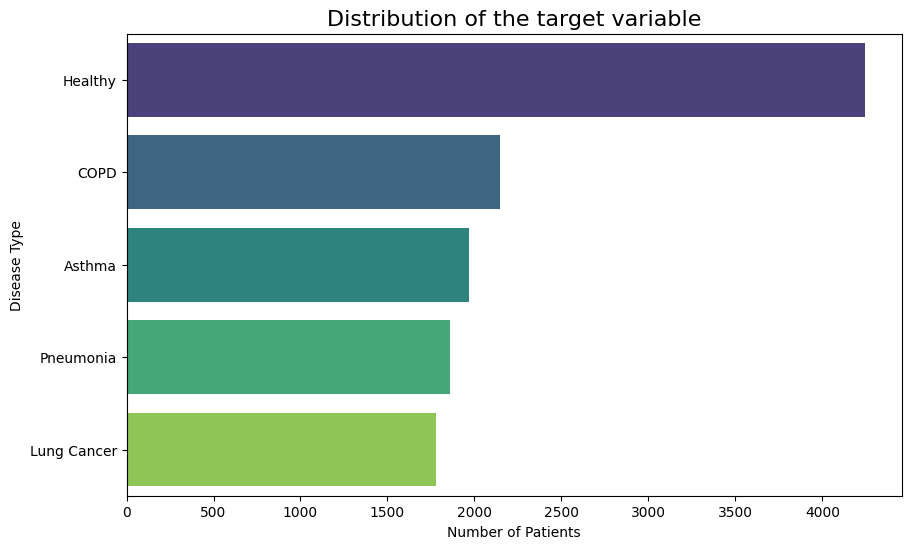

In [5]:
# Plot the distribution as a bar chart
plt.figure(figsize=(10,6))
sns.countplot(y=target_variable, data=df, order=disease_counts.index, palette='viridis')
plt.title('Distribution of the target variable', fontsize=16)
plt.xlabel('Number of Patients')
plt.ylabel('Disease Type')
plt.show()

Generate descriptive statistics for key numerical features (mean, median, standard deviation).


In [6]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude ID column if present
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')

# Calculate descriptive statistics: mean, median, standard deviation
descriptive_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Standard Deviation': df[numerical_cols].std()
})

# Display the results
print("Descriptive statistics for numerical features:")
print(descriptive_stats)


Descriptive statistics for numerical features:
                                 Mean  Median  Standard Deviation
age                         58.070833   58.00           14.741634
bmi                         27.008608   27.00            4.961936
pack_years                  14.767758   10.30           14.848183
pm25_exposure               15.114308   15.00            6.689190
cough                        0.417333    0.00            0.493139
dyspnea                      0.397250    0.00            0.489349
wheeze                       0.246750    0.00            0.431138
chest_pain                   0.138083    0.00            0.345002
fever                        0.167000    0.00            0.372991
hemoptysis                   0.028083    0.00            0.165218
weight_loss_kg               1.624208    1.40            2.422476
spo2                        95.962800   96.00            2.376014
respiratory_rate            17.974033   18.00            2.993347
crp_mg_L                    2

Create visualizations (histograms, bar charts, box plots) to identify trends, outliers, and skewness.


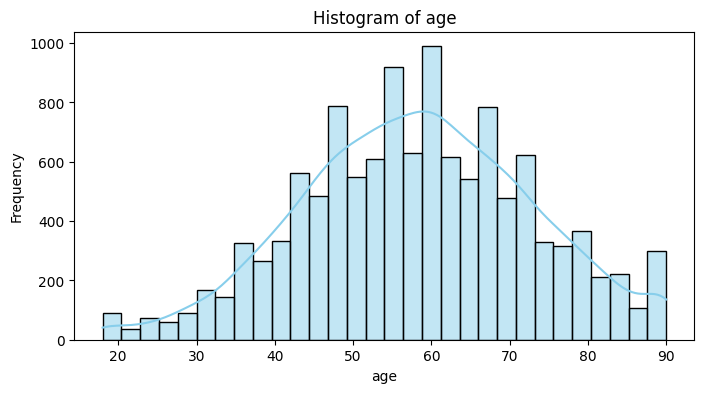

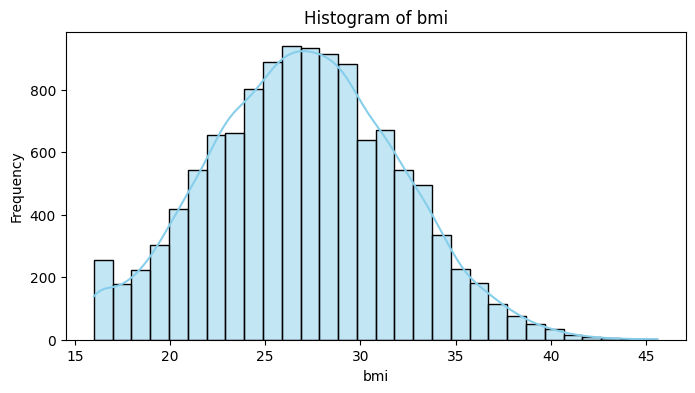

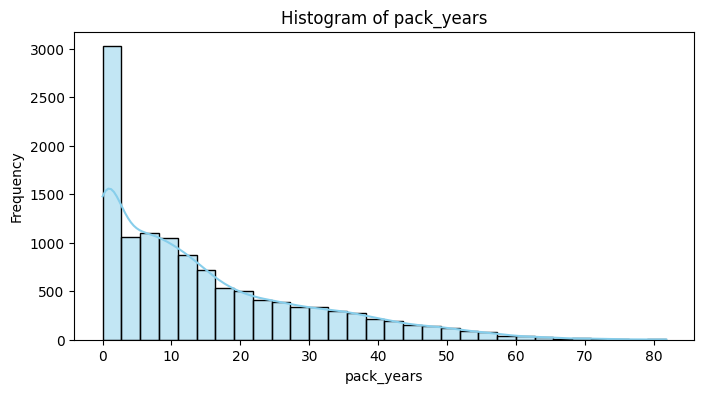

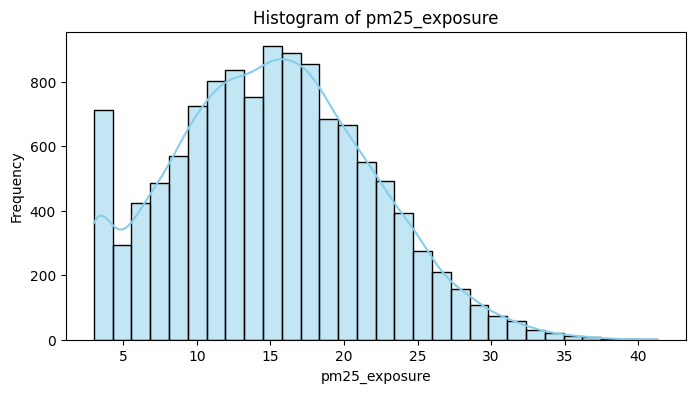

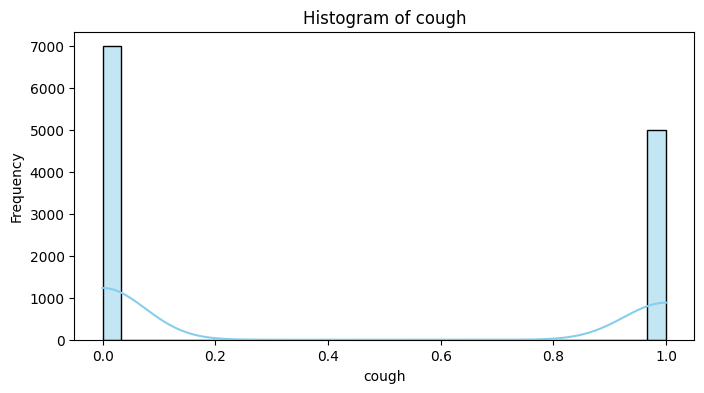

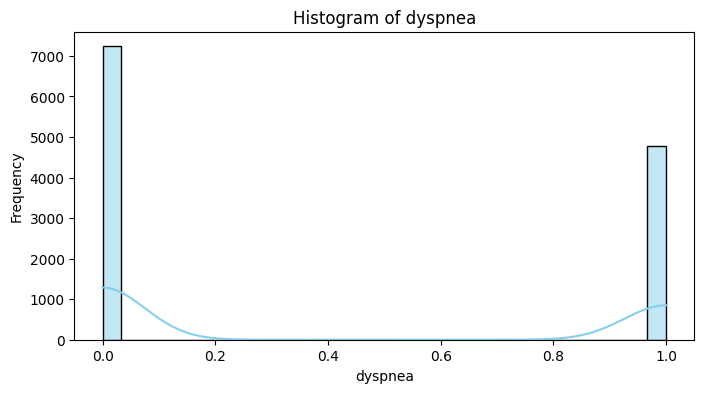

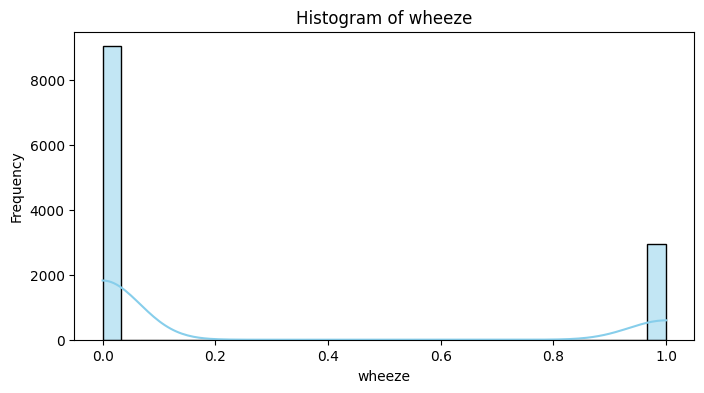

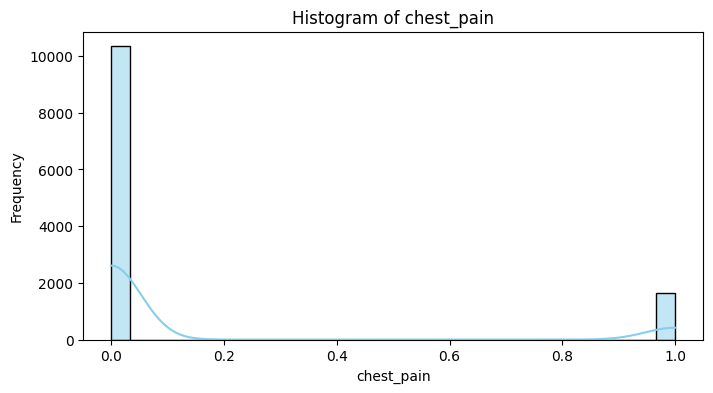

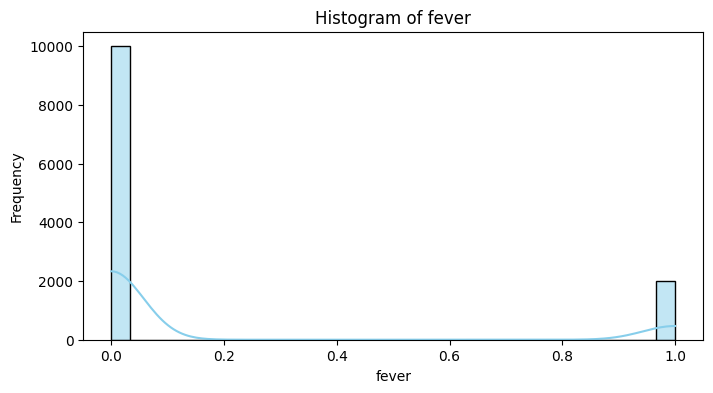

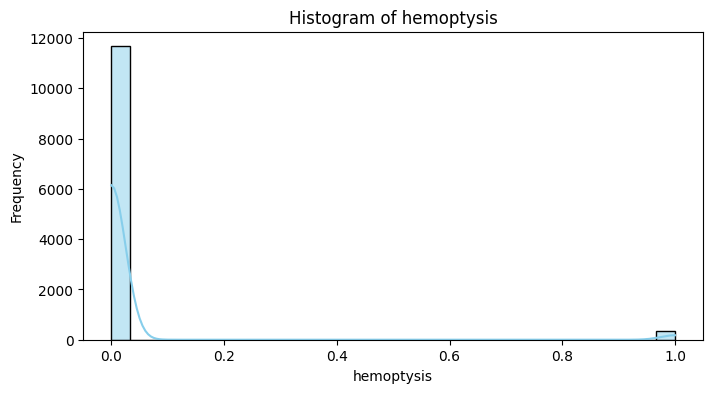

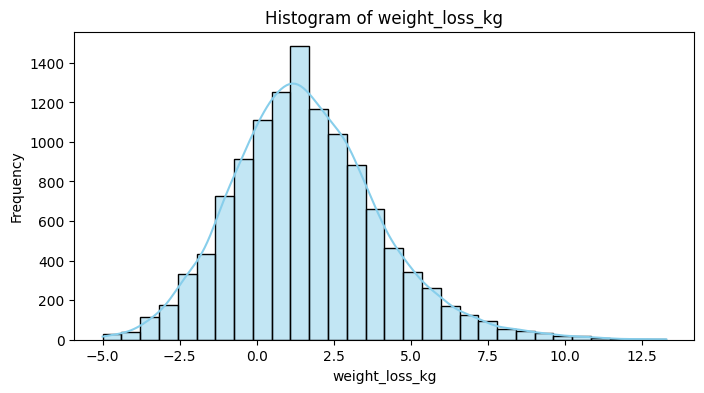

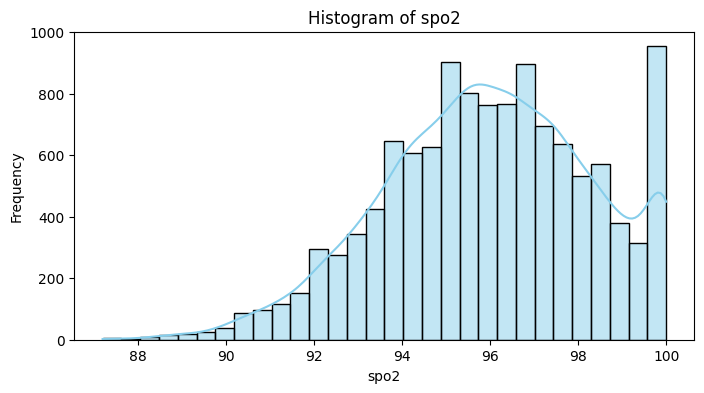

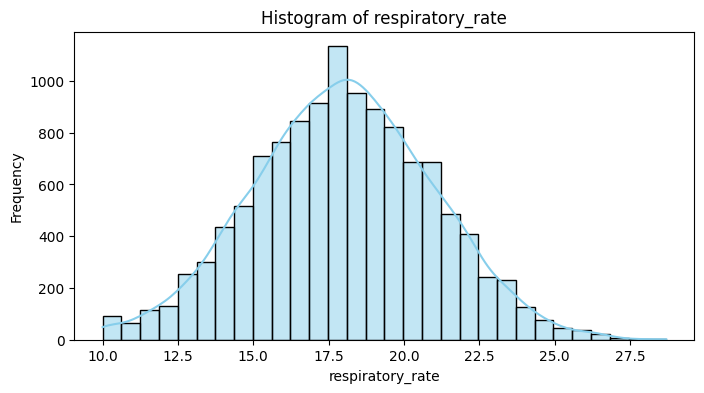

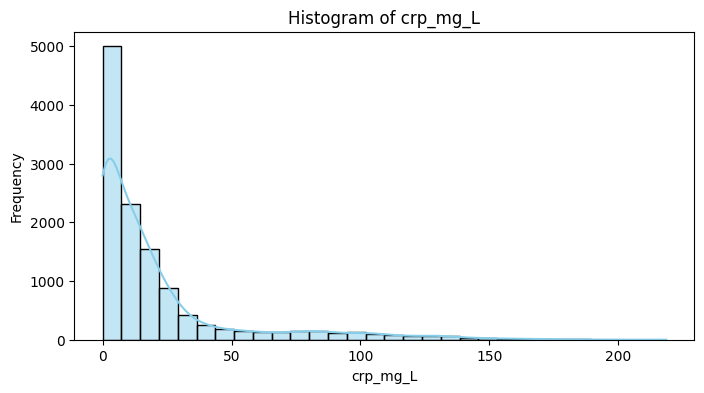

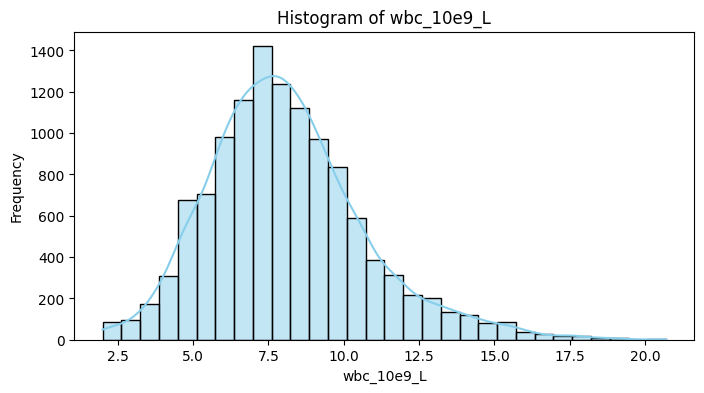

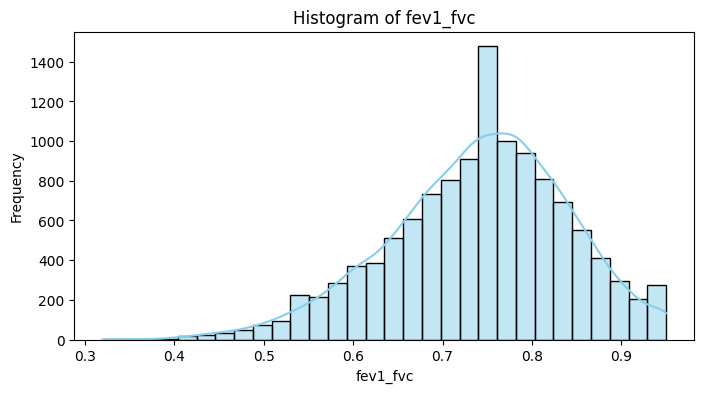

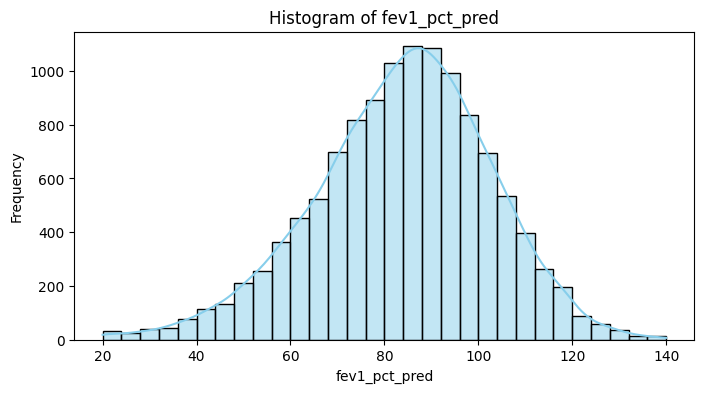

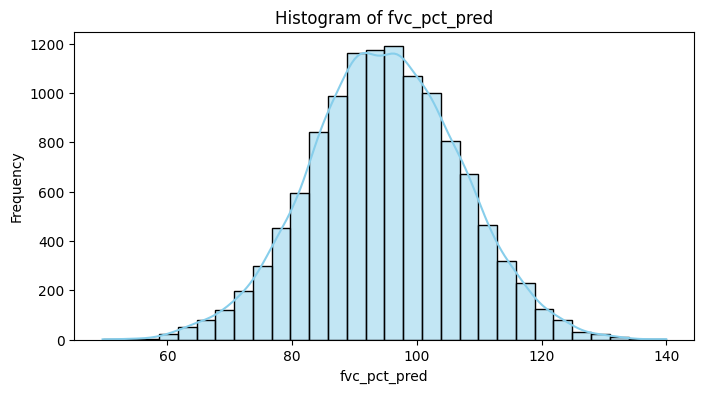

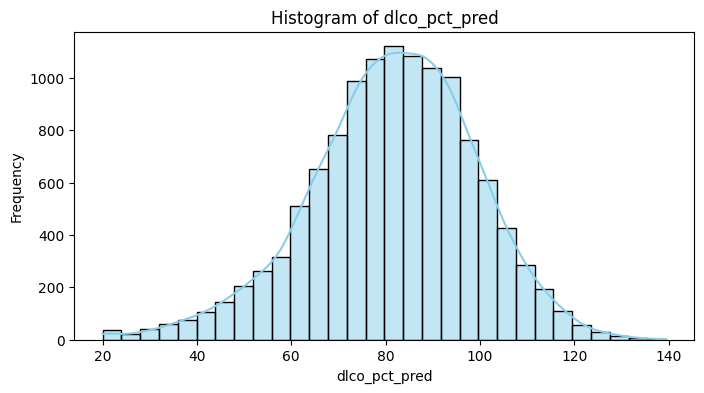

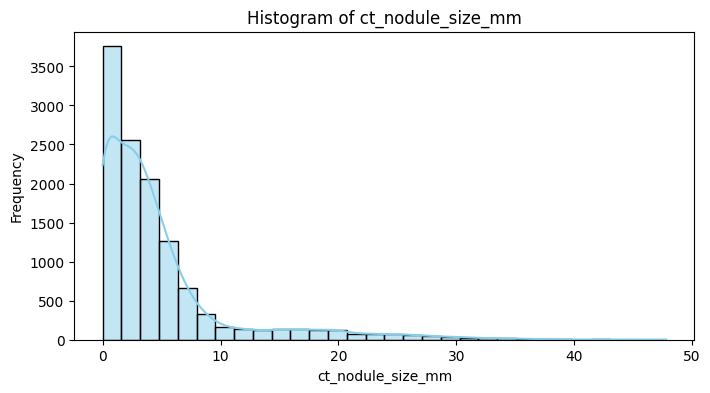

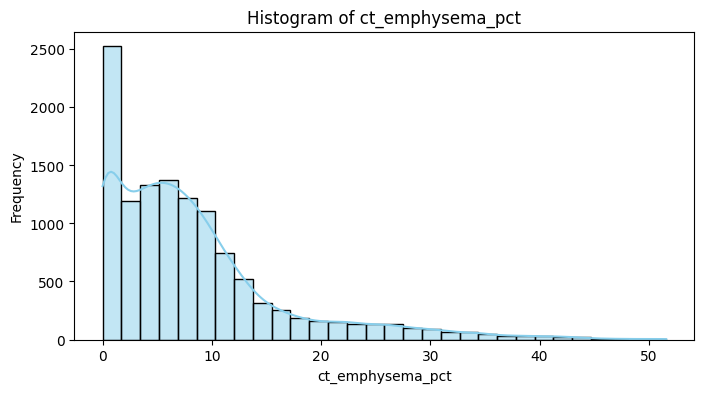

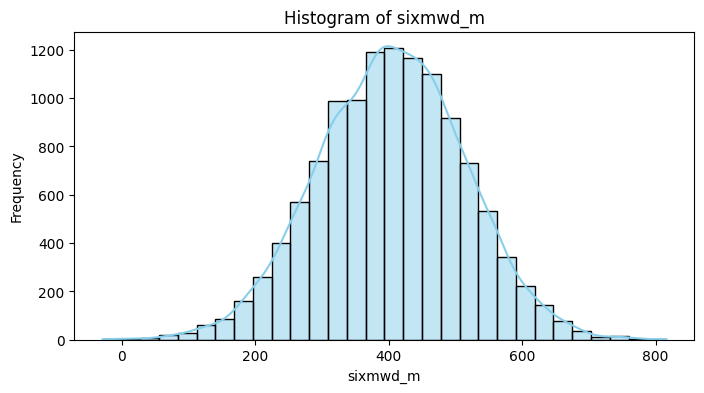

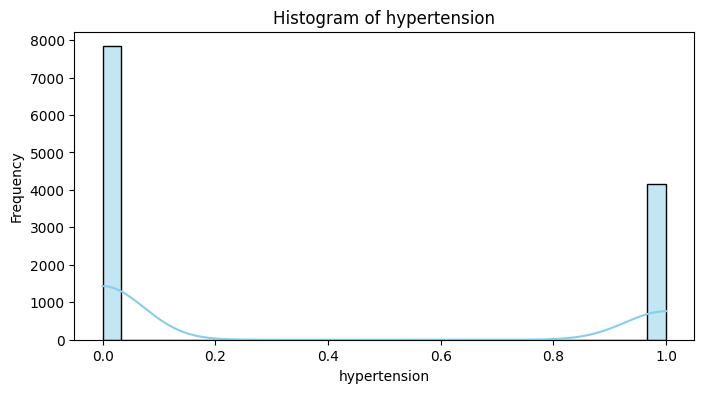

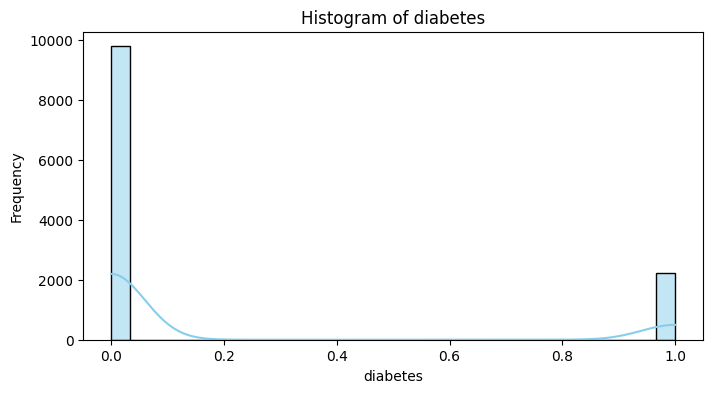

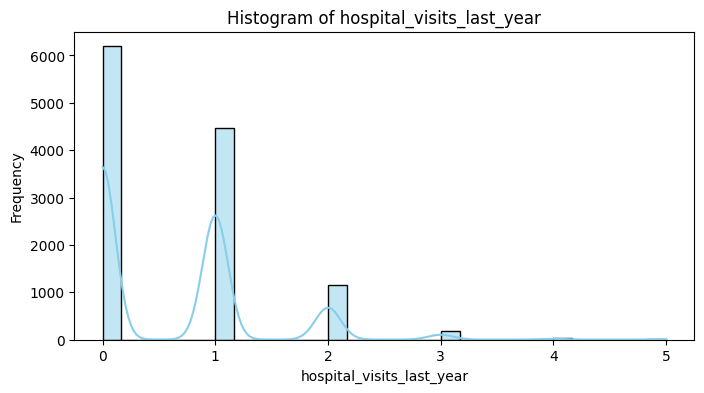

In [7]:
# 1. Histograms for distribution and skewness
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


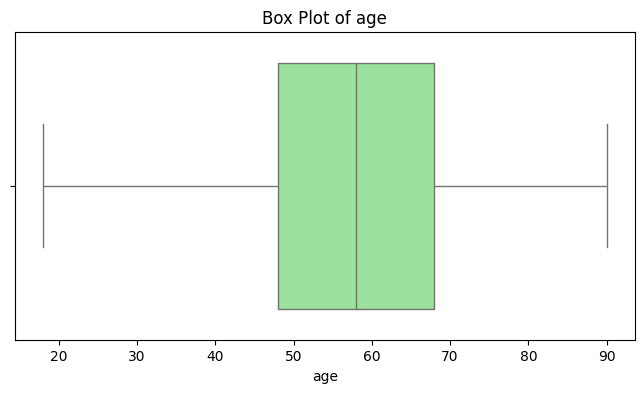

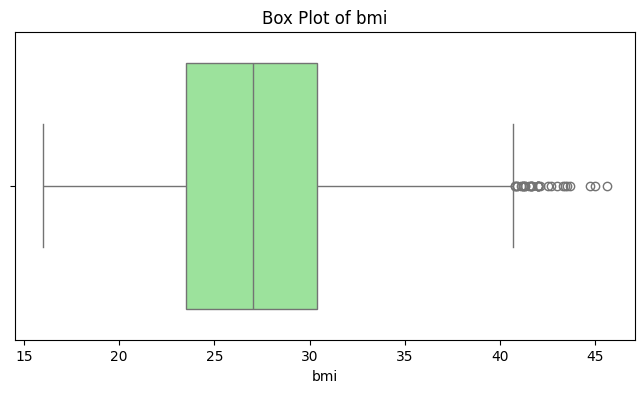

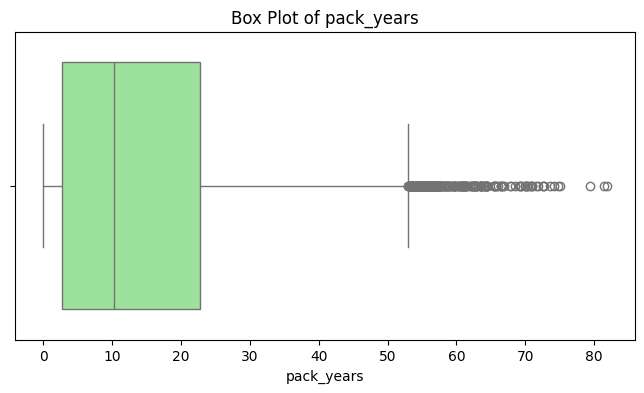

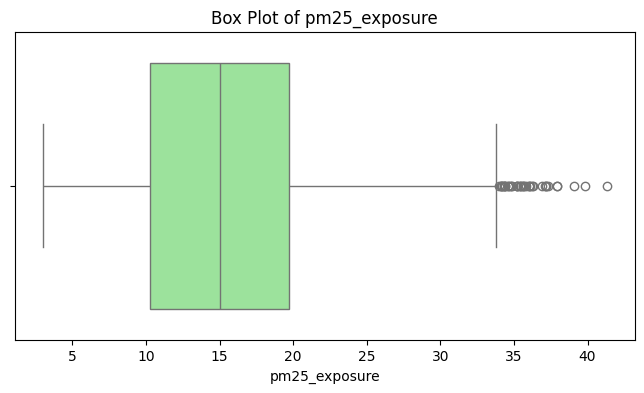

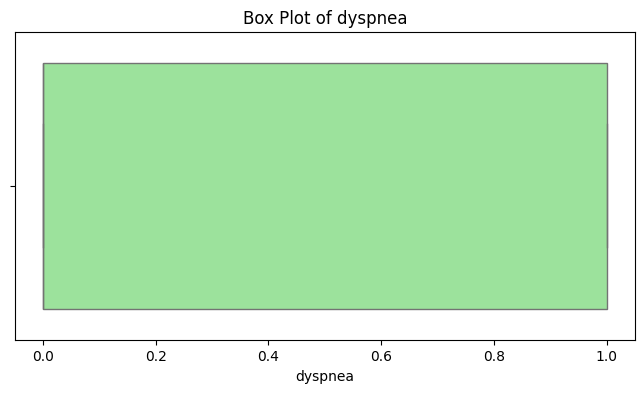

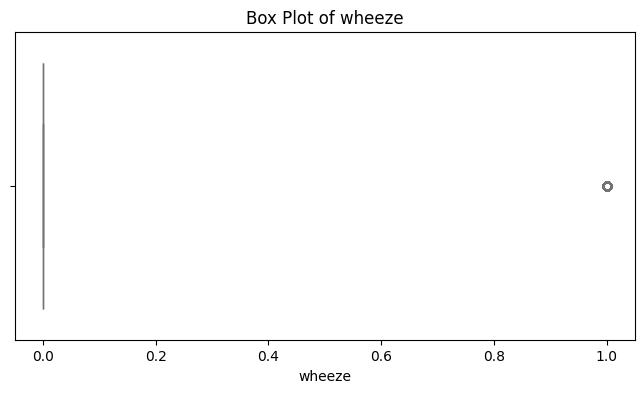

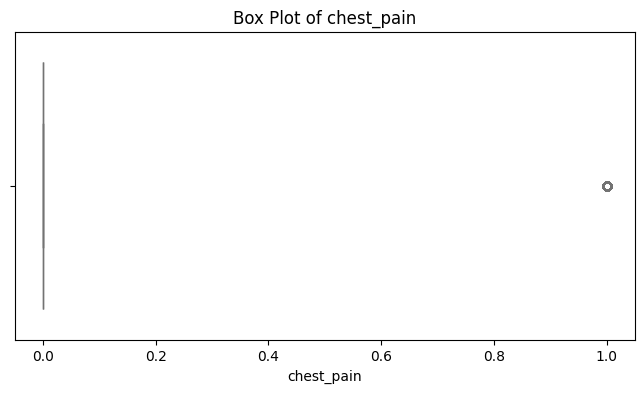

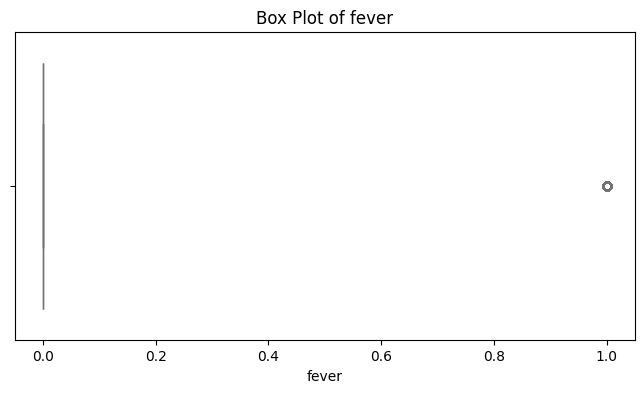

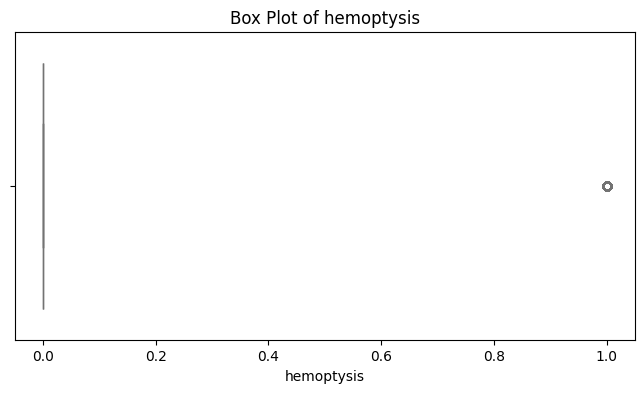

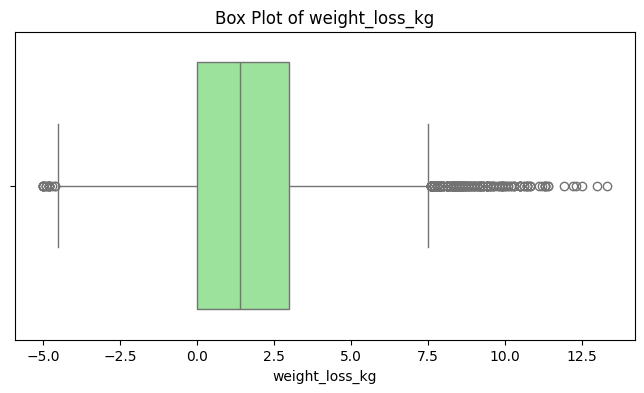

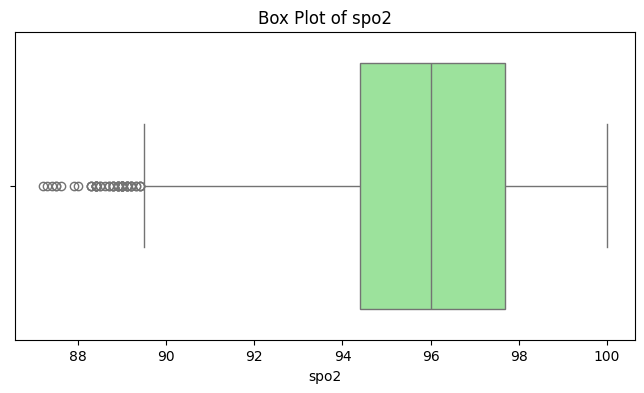

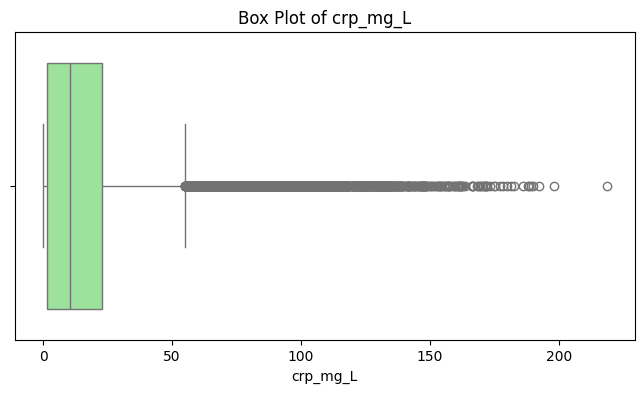

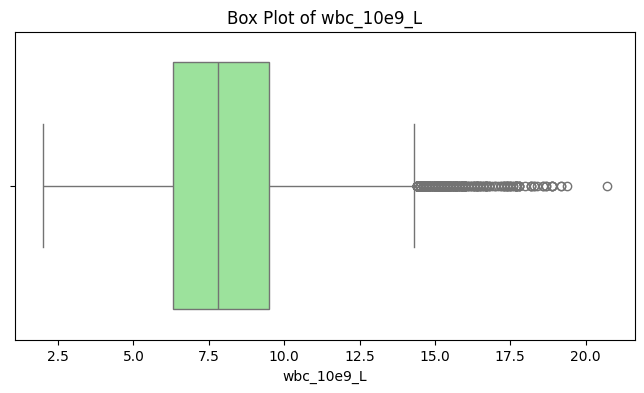

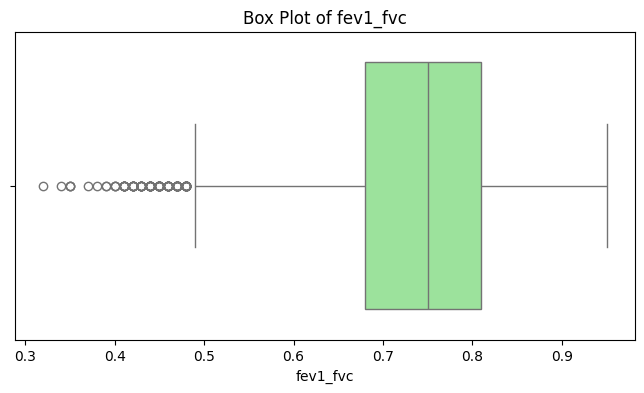

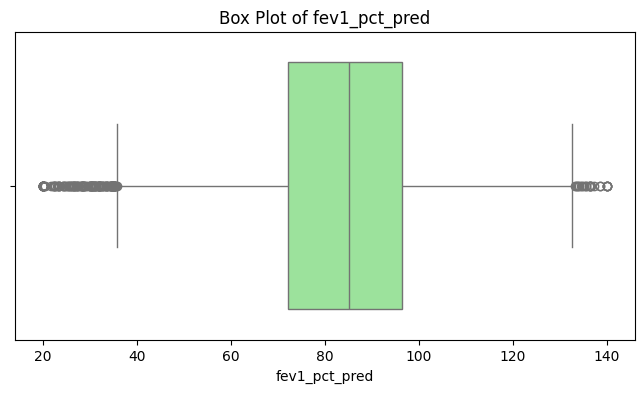

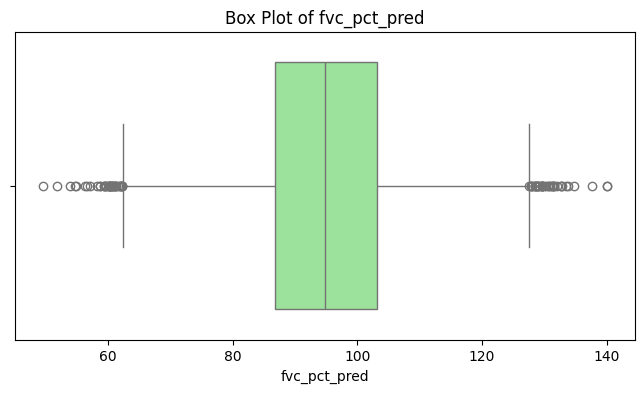

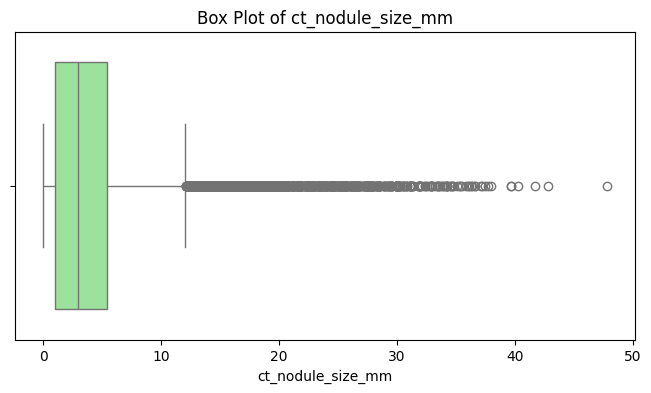

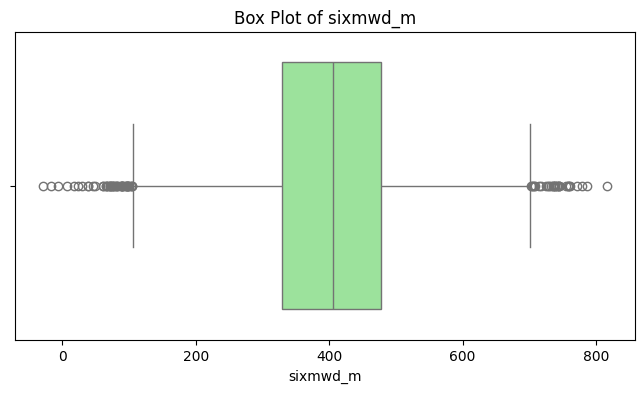

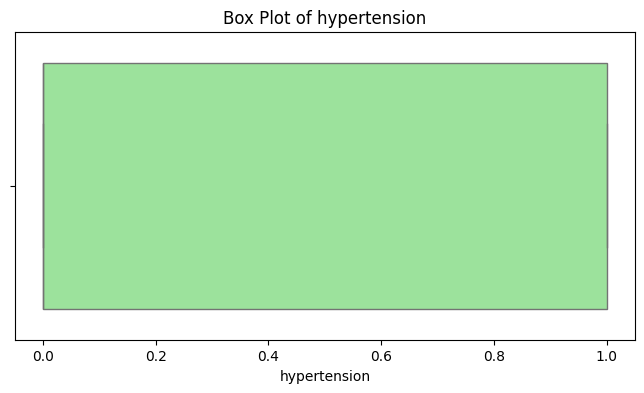

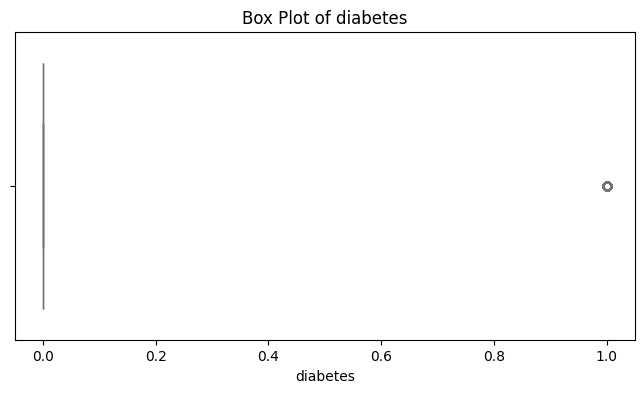

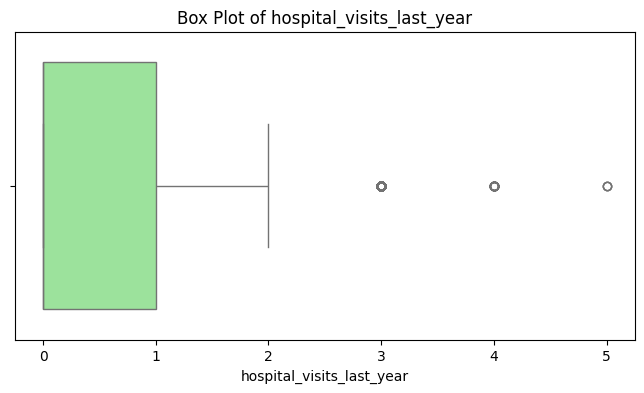

In [8]:
# 2. Box plots for outliers
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

Explore correlations between numerical features and the target.


In [9]:
# Convert disease_type to numeric codes
# Encode the target variable
df['disease_code'] = df['disease_type'].astype('category').cat.codes

# Check the mapping
target_mapping = dict(enumerate(df['disease_type'].astype('category').cat.categories))
print("Target encoding mapping:", target_mapping)

Target encoding mapping: {0: 'Asthma', 1: 'COPD', 2: 'Healthy', 3: 'Lung Cancer', 4: 'Pneumonia'}


Computing the correlations

In [10]:
# Select numerical features (exclude ID)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')

# Compute correlations with the encoded target
correlations = df[numerical_cols + ['disease_code']].corr()['disease_code'].sort_values(ascending=False)
print("Correlations with the target variable:")
print(correlations)

Correlations with the target variable:
disease_code                 1.000000
crp_mg_L                     0.592178
fever                        0.453563
wbc_10e9_L                   0.388916
fev1_fvc                     0.372064
fev1_pct_pred                0.338662
ct_nodule_size_mm            0.242620
dlco_pct_pred                0.167489
chest_pain                   0.115503
weight_loss_kg               0.087517
hemoptysis                   0.087409
pack_years                   0.061260
cough                        0.039269
sixmwd_m                     0.007802
bmi                          0.007602
fvc_pct_pred                 0.007260
hypertension                 0.005319
age                          0.001363
respiratory_rate            -0.001271
pm25_exposure               -0.005367
diabetes                    -0.007667
spo2                        -0.008095
hospital_visits_last_year   -0.010857
dyspnea                     -0.014211
ct_emphysema_pct            -0.242099
wheeze     

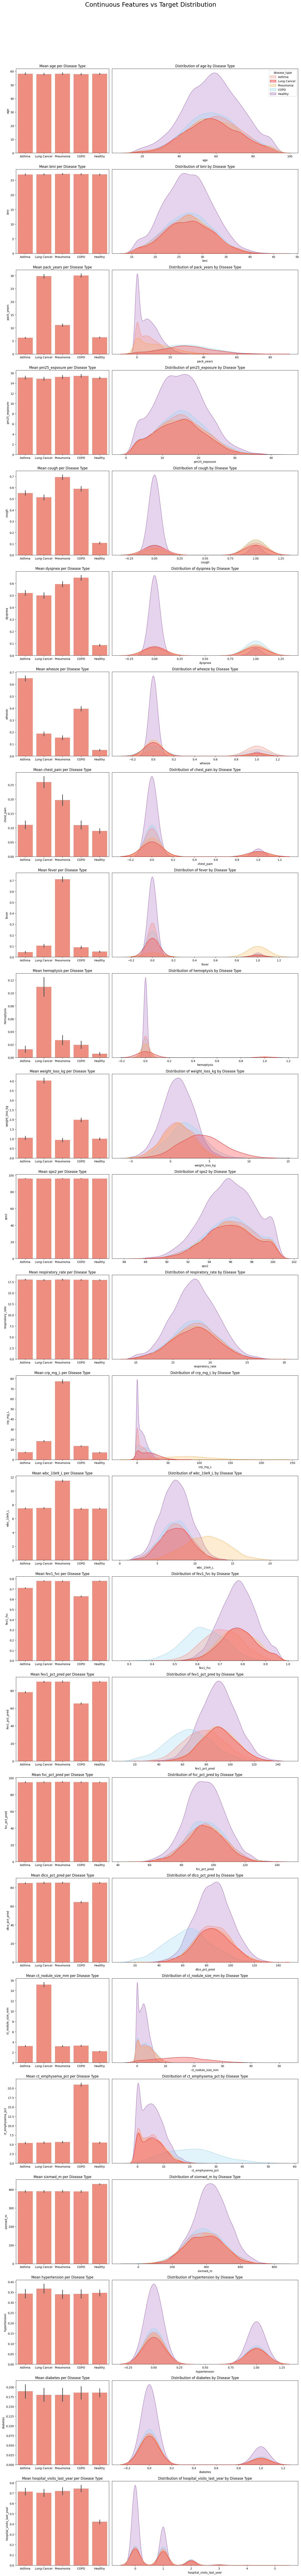

In [11]:
# Define continuous numerical features (exclude patient_id and target)
continuous_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'patient_id' in continuous_features:
    continuous_features.remove('patient_id')

# Define target variable
target = 'disease_type'

# Set color palette
sns.set_palette(['#ff826e', 'red', '#ffb347', '#8fd3f4', '#9b59b6'])

# Create subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 5*len(continuous_features)), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature per disease type
    sns.barplot(data=df, x=target, y=col, ax=ax[i, 0])
    ax[i, 0].set_title(f'Mean {col} per Disease Type')
    ax[i, 0].set_xlabel('')
    ax[i, 0].set_ylabel(col)

    # KDE plot showing the distribution of the feature per disease type
    sns.kdeplot(data=df, x=col, hue=target, fill=True, ax=ax[i, 1], legend=(i == 0))
    ax[i, 1].set_title(f'Distribution of {col} by Disease Type')
    ax[i, 1].set_yticks([])
    ax[i, 1].set_ylabel('')

plt.suptitle('Continuous Features vs Target Distribution', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

Identify features that appear strongly linked to specific lung disease categories.


Mean values of numerical features per disease type:
                    age        bmi  pack_years  pm25_exposure     cough  \
disease_type                                                              
Asthma        58.216463  26.953506    6.231555      15.084654  0.551829   
COPD          57.821146  27.051653   30.008989      15.424406  0.589194   
Healthy       58.128683  26.964436    6.341386      15.022413  0.107471   
Lung Cancer   57.883212  26.985345   29.771982      14.867827  0.512633   
Pneumonia     58.252552  27.140193   11.063783      15.233315  0.692101   

               dyspnea    wheeze  chest_pain     fever  hemoptysis  ...  \
disease_type                                                        ...   
Asthma        0.519309  0.649898    0.110264  0.044207    0.012703  ...   
COPD          0.646483  0.395435    0.109455  0.089427    0.019562  ...   
Healthy       0.086024  0.050672    0.088852  0.050200    0.005892  ...   
Lung Cancer   0.498596  0.186974    0.259405  0

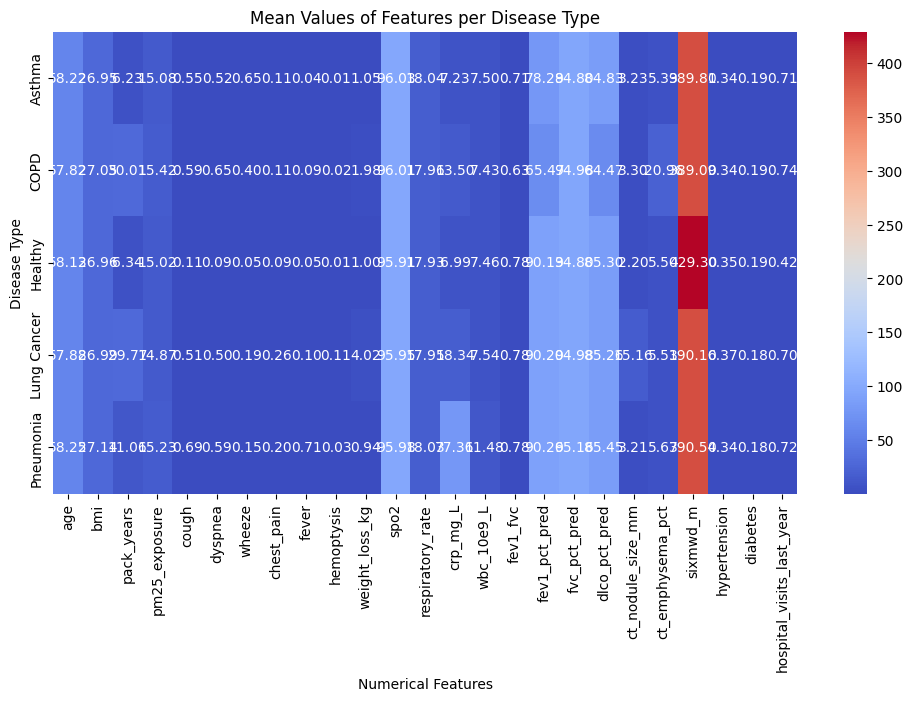

In [12]:
# 1. Compute mean values per disease type

feature_means = df.groupby(target)[numerical_cols].mean()
print("Mean values of numerical features per disease type:")
print(feature_means)


# 2. Compute feature importance using correlation with encoded target

# Encode target numerically
df['disease_code'] = df[target].astype('category').cat.codes

# Compute correlation between each numerical feature and the encoded target
correlations = df[numerical_cols + ['disease_code']].corr()['disease_code'].sort_values(key=abs, ascending=False)
print("\nCorrelation of numerical features with disease type:")
print(correlations)


# 3. Visualize using a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(feature_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mean Values of Features per Disease Type")
plt.ylabel("Disease Type")
plt.xlabel("Numerical Features")
plt.show()

Conclusion
Strongly linked features to specific lung diseases:

Lung Cancer - ct_nodule_size_mm, hospital_visits_last_year

COPD - pack_years, ct_emphysema_pct, dyspnea

Pneumonia - fever, crp_mg_L, wbc_10e9_L

Asthma - wheeze, fev1_fvc, fev1_pct_pred


##TASK 2 : Data Preparation

Identify missing values and describe your chosen handling method (imputation or removal)

In [13]:
# Check missing values per column
missing_values = df.isna().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

print("Missing values per column:")
print(missing_values)


Missing values per column:
family_history    7176
dtype: int64


##Explanation
“The family_history column had 7,176 missing values (~60% of the dataset). Due to the high proportion of missing data, dropping rows or imputing with the mode could introduce significant bias. Therefore, missing values were replaced with a new category ‘Unknown’, preserving all records while allowing the dataset to retain information about missingness.”

Handling Missing Values

In [14]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Handle categorical column: family_history
if 'family_history' in categorical_cols:
    df['family_history'] = df['family_history'].fillna('Unknown')

# If there are other categorical columns with missing values, fill with mode
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Handle numerical columns: fill missing values with median
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


# 4. Verify missing values handled
print("\nMissing values after handling:")
print(df.isna().sum())


Missing values after handling:
patient_id                   0
age                          0
sex                          0
bmi                          0
smoking_status               0
pack_years                   0
pm25_exposure                0
occupation                   0
family_history               0
cough                        0
dyspnea                      0
wheeze                       0
chest_pain                   0
fever                        0
hemoptysis                   0
weight_loss_kg               0
spo2                         0
respiratory_rate             0
crp_mg_L                     0
wbc_10e9_L                   0
fev1_fvc                     0
fev1_pct_pred                0
fvc_pct_pred                 0
dlco_pct_pred                0
cxr_finding                  0
ct_nodule_size_mm            0
ct_emphysema_pct             0
sixmwd_m                     0
hypertension                 0
diabetes                     0
hospital_visits_last_year    0
disease

Encode categorical variables appropriately (One-Hot Encoding, Label Encoding, or similar).


In [15]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['sex', 'smoking_status', 'occupation', 'family_history', 'cxr_finding', 'disease_type', 'severity']


In [16]:
#Separate features and targets
# Define target column
target_col = 'disease_type'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

In [17]:
#Label Encode the target variable
# Initialize Label Encoder
le = LabelEncoder()

# Encode target
y_encoded = le.fit_transform(y)


In [18]:
# Identify categorical feature columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply One-Hot Encoding to features
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [19]:
#Verify Encoding
print("Encoded feature columns:")
print(X_encoded.columns)

print("\nUnique encoded target classes:")
print(le.classes_)


Encoded feature columns:
Index(['patient_id', 'age', 'bmi', 'pack_years', 'pm25_exposure', 'cough',
       'dyspnea', 'wheeze', 'chest_pain', 'fever', 'hemoptysis',
       'weight_loss_kg', 'spo2', 'respiratory_rate', 'crp_mg_L', 'wbc_10e9_L',
       'fev1_fvc', 'fev1_pct_pred', 'fvc_pct_pred', 'dlco_pct_pred',
       'ct_nodule_size_mm', 'ct_emphysema_pct', 'sixmwd_m', 'hypertension',
       'diabetes', 'hospital_visits_last_year', 'disease_code', 'sex_Male',
       'smoking_status_Former', 'smoking_status_Never',
       'occupation_Construction', 'occupation_Healthcare',
       'occupation_Manufacturing', 'occupation_Mining', 'occupation_Office',
       'occupation_Unemployed/Other', 'family_history_COPD',
       'family_history_Cancer', 'family_history_Unknown',
       'cxr_finding_Consolidation', 'cxr_finding_Flattened Diaphragm',
       'cxr_finding_Hyperinflation', 'cxr_finding_Infiltrate',
       'cxr_finding_Mass/Nodule', 'cxr_finding_Normal',
       'cxr_finding_Pleural Effusi

##Explanation
Categorical variables were encoded using a combination of label encoding and one-hot encoding. The target variable (disease_type) was label encoded to maintain a single output label required by tree-based models. Categorical input features were one-hot encoded to avoid introducing artificial ordinal relationships among categories.

###Apply scaling to numerical variables (StandardScaler or MinMaxScaler, or similar).

In [20]:
# Identify numerical columns in your features
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()



###Explanation
“A StandardScaler was initialized to normalize numerical features. To prevent data leakage, the scaler was defined at this stage but was not fitted until after the dataset was split into training and testing sets.”

##Task 3: Model Training

###Split the dataset into training and testing sets. Justify the chosen split ratio.

In [21]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,  # target variable already label encoded
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [22]:
#Initialize and apply the scaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data (numerical columns only)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [23]:
#Verifying scaling worked
# Check mean and standard deviation of training set
X_train[numerical_cols].describe().loc[['mean', 'std']]


patient_id           age           bmi    pack_years  pm25_exposure  \
mean  3.700743e-18 -8.641236e-17  6.117329e-16 -1.776357e-17   1.014004e-16   
std   1.000052e+00  1.000052e+00  1.000052e+00  1.000052e+00   1.000052e+00   

             cough       dyspnea        wheeze    chest_pain         fever  \
mean -5.902686e-17 -7.179442e-17  9.621933e-18  1.480297e-17 -2.701543e-17   
std   1.000052e+00  1.000052e+00  1.000052e+00  1.000052e+00  1.000052e+00   

      ...      fev1_fvc  fev1_pct_pred  fvc_pct_pred  dlco_pct_pred  \
mean  ... -9.851379e-16   1.156482e-16  9.035365e-16  -3.019807e-16   
std   ...  1.000052e+00   1.000052e+00  1.000052e+00   1.000052e+00   

      ct_nodule_size_mm  ct_emphysema_pct      sixmwd_m  hypertension  \
mean       4.292862e-17     -2.105723e-16 -2.187139e-16 -3.700743e-17   
std        1.000052e+00      1.000052e+00  1.000052e+00  1.000052e+00   

          diabetes  hospital_visits_last_year  
mean -7.401487e-18              -2.183439e-17  
std   1.000052e+00               1.000052e+00  

[2 rows x 26 columns]

##Explanation
The dataset was split into training (80%) and testing (20%) sets to balance the need for sufficient training data and reliable evaluation. Stratified sampling preserved the class distribution across the splits. Feature scaling was then applied only to the training set and subsequently to the test set to prevent data leakage, ensuring models sensitive to feature scale (Logistic Regression, SVM, K-Nearest Neighbors) perform optimally.

##Training multiple classification

##Logistic Regression
Logistic Regression was chosen because the target variable is categorical, and the dataset contains a mix of numerical and one-hot encoded categorical features. It handles multi-class classification efficiently and provides interpretable coefficients. Numerical features were scaled to ensure proportional contribution. Default hyperparameters were used to establish a baseline, and evaluation will include accuracy, F1-score, precision, and recall to capture both overall and class-specific performance.

In [24]:
#Train logistic regression and record hyperparameters

# Initialize Logistic Regression with default parameters
logreg = LogisticRegression(max_iter=100, multi_class='auto', solver='lbfgs')

# Record default hyperparameters
print("Default Logistic Regression hyperparameters:")
print(logreg.get_params())

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)



Default Logistic Regression hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [25]:
# Save predictions for later
logreg_results = {
    'y_train_pred': y_train_pred,
    'y_test_pred': y_test_pred
}

# Save metrics for later evaluation
logreg_metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred),
    'test_accuracy': accuracy_score(y_test, y_test_pred),
    'train_f1': f1_score(y_train, y_train_pred, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred, average='weighted'),
    'train_precision': precision_score(y_train, y_train_pred, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
    'train_recall': recall_score(y_train, y_train_pred, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred, average='weighted')
}

# Optional: view test metrics
print("Logistic Regression Test Metrics:")
for metric, value in logreg_metrics.items():
    if 'test' in metric:
        print(f"{metric}: {value:.4f}")


Logistic Regression Test Metrics:
test_accuracy: 0.9979
test_f1: 0.9979
test_precision: 0.9979
test_recall: 0.9979


##Support Vector Machine (SVM)

##Justification
Support Vector Machine (SVM) was selected because it is effective for multi-class classification problems and can handle high-dimensional datasets, such as the one with numerical and one-hot encoded categorical features. SVM finds optimal hyperplanes to separate classes, making it suitable for complex decision boundaries. Scaling numerical features is important because SVM is sensitive to feature magnitudes. Default hyperparameters are used initially to establish a baseline, with evaluation metrics including accuracy, F1-score, precision, and recall to assess both overall and class-specific performance.

In [26]:
#Train SVM nad recording

# Initialize SVM with default parameters
svm_model = SVC()  # default: kernel='rbf', C=1.0, gamma='scale'

# Print default hyperparameters
print("Default SVM hyperparameters:")
print(svm_model.get_params())

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)


Default SVM hyperparameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [27]:
# Save predictions
svm_results = {
    'y_train_pred': y_train_pred_svm,
    'y_test_pred': y_test_pred_svm
}

# Save evaluation metrics
svm_metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_svm),
    'test_accuracy': accuracy_score(y_test, y_test_pred_svm),
    'train_f1': f1_score(y_train, y_train_pred_svm, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred_svm, average='weighted'),
    'train_precision': precision_score(y_train, y_train_pred_svm, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred_svm, average='weighted'),
    'train_recall': recall_score(y_train, y_train_pred_svm, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred_svm, average='weighted')
}

# Optional: view test metrics
print("SVM Test Metrics:")
for metric, value in svm_metrics.items():
    if 'test' in metric:
        print(f"{metric}: {value:.4f}")


SVM Test Metrics:
test_accuracy: 0.9992
test_f1: 0.9992
test_precision: 0.9992
test_recall: 0.9992


##Decision Tree
Decision Tree was selected because it can handle both numerical and categorical features directly and is capable of modeling complex, non-linear relationships in the data. It does not require feature scaling, making it suitable for datasets with mixed types. Decision Trees are interpretable and provide insights into feature importance. Default hyperparameters are used initially to establish baseline performance, with evaluation metrics including accuracy, F1-score, precision, and recall to assess overall and class-specific performance

In [28]:
# Initialize Decision Tree with default parameters
dt_model = DecisionTreeClassifier()

# Print default hyperparameters
print("Default Decision Tree hyperparameters:")
print(dt_model.get_params())

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)


Default Decision Tree hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [29]:
# Save predictions
dt_results = {
    'y_train_pred': y_train_pred_dt,
    'y_test_pred': y_test_pred_dt
}

# Save evaluation metrics
dt_metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_dt),
    'test_accuracy': accuracy_score(y_test, y_test_pred_dt),
    'train_f1': f1_score(y_train, y_train_pred_dt, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred_dt, average='weighted'),
    'train_precision': precision_score(y_train, y_train_pred_dt, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred_dt, average='weighted'),
    'train_recall': recall_score(y_train, y_train_pred_dt, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred_dt, average='weighted')
}

# Optional: view test metrics
print("Decision Tree Test Metrics:")
for metric, value in dt_metrics.items():
    if 'test' in metric:
        print(f"{metric}: {value:.4f}")


Decision Tree Test Metrics:
test_accuracy: 1.0000
test_f1: 1.0000
test_precision: 1.0000
test_recall: 1.0000


##Justification
Random Forest was selected because it is an ensemble of decision trees that can handle both numerical and categorical features directly, model complex non-linear relationships, and reduce overfitting compared to a single Decision Tree. It is scale-invariant, so feature scaling is not required. Random Forest also provides feature importance measures, making it useful for interpreting which variables influence the target. Default hyperparameters are used initially to establish baseline performance, and evaluation metrics include accuracy, F1-score, precision, and recall to assess overall and class-specific performance.

In [30]:
# Initialize Random Forest with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Print default hyperparameters
print("Default Random Forest hyperparameters:")
print(rf_model.get_params())

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


Default Random Forest hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [31]:
# Save predictions
rf_results = {
    'y_train_pred': y_train_pred_rf,
    'y_test_pred': y_test_pred_rf
}

# Save evaluation metrics
rf_metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_rf),
    'test_accuracy': accuracy_score(y_test, y_test_pred_rf),
    'train_f1': f1_score(y_train, y_train_pred_rf, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred_rf, average='weighted'),
    'train_precision': precision_score(y_train, y_train_pred_rf, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred_rf, average='weighted'),
    'train_recall': recall_score(y_train, y_train_pred_rf, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred_rf, average='weighted')
}

# Optional: view test metrics
print("Random Forest Test Metrics:")
for metric, value in rf_metrics.items():
    if 'test' in metric:
        print(f"{metric}: {value:.4f}")


Random Forest Test Metrics:
test_accuracy: 1.0000
test_f1: 1.0000
test_precision: 1.0000
test_recall: 1.0000


##K-Nearest Neighbors
K-Nearest Neighbors (KNN) was selected because it is a simple, instance-based classifier that predicts the class of a sample based on the majority class among its nearest neighbors. It works well for datasets with moderate sample size and numerical features, and since it relies on distance calculations, feature scaling is essential to ensure all variables contribute proportionally. KNN provides a non-parametric approach to classification, allowing it to capture complex decision boundaries without assuming a specific functional form. Default hyperparameters are used initially to establish baseline performance, and evaluation metrics include accuracy, F1-score, precision, and recall to assess both overall and class-specific performance.

In [32]:
# Initialize KNN with default parameters
knn_model = KNeighborsClassifier()  # default: n_neighbors=5, metric='minkowski', p=2

# Print default hyperparameters
print("Default KNN hyperparameters:")
print(knn_model.get_params())

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)


Default KNN hyperparameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [33]:
# Save predictions
knn_results = {
    'y_train_pred': y_train_pred_knn,
    'y_test_pred': y_test_pred_knn
}

# Save evaluation metrics
knn_metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_knn),
    'test_accuracy': accuracy_score(y_test, y_test_pred_knn),
    'train_f1': f1_score(y_train, y_train_pred_knn, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred_knn, average='weighted'),
    'train_precision': precision_score(y_train, y_train_pred_knn, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred_knn, average='weighted'),
    'train_recall': recall_score(y_train, y_train_pred_knn, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred_knn, average='weighted')
}

# Optional: view test metrics
print("KNN Test Metrics:")
for metric, value in knn_metrics.items():
    if 'test' in metric:
        print(f"{metric}: {value:.4f}")


KNN Test Metrics:
test_accuracy: 0.9413
test_f1: 0.9411
test_precision: 0.9449
test_recall: 0.9413


##TASK 4: Model Evaluation and Visualization

In [34]:
# Combine all saved metrics into a single dictionary
all_metrics = {
    'Logistic Regression': logreg_metrics,
    'SVM': svm_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'KNN': knn_metrics
}


In [35]:
#Create a DataFrame for test metrics only
# Extract only the test metrics for comparison
comparison_metrics = pd.DataFrame({
    model: {
        'Accuracy': metrics['test_accuracy'],
        'F1-score': metrics['test_f1'],
        'Precision': metrics['test_precision'],
        'Recall': metrics['test_recall']
    }
    for model, metrics in all_metrics.items()
}).T  # Transpose for readability

# Display comparison table
print("Model Comparison (Test Set):")
comparison_metrics


Model Comparison (Test Set):


Accuracy  F1-score  Precision    Recall
Logistic Regression  0.997917  0.997916   0.997929  0.997917
SVM                  0.999167  0.999166   0.999168  0.999167
Decision Tree        1.000000  1.000000   1.000000  1.000000
Random Forest        1.000000  1.000000   1.000000  1.000000
KNN                  0.941250  0.941140   0.944882  0.941250

In [36]:
#Display all metrics including training set
# Compare training vs testing metrics for overfitting check
train_test_comparison = pd.DataFrame({
    model: {
        'Train Accuracy': metrics['train_accuracy'],
        'Test Accuracy': metrics['test_accuracy'],
        'Train F1': metrics['train_f1'],
        'Test F1': metrics['test_f1'],
        'Train Precision': metrics['train_precision'],
        'Test Precision': metrics['test_precision'],
        'Train Recall': metrics['train_recall'],
        'Test Recall': metrics['test_recall']
    }
    for model, metrics in all_metrics.items()
}).T

print("Training vs Testing Metrics Comparison:")
train_test_comparison


Training vs Testing Metrics Comparison:


Train Accuracy  Test Accuracy  Train F1   Test F1  \
Logistic Regression        0.999062       0.997917  0.999062  0.997916   
SVM                        1.000000       0.999167  1.000000  0.999166   
Decision Tree              1.000000       1.000000  1.000000  1.000000   
Random Forest              1.000000       1.000000  1.000000  1.000000   
KNN                        0.957604       0.941250  0.957563  0.941140   

                     Train Precision  Test Precision  Train Recall  \
Logistic Regression         0.999064        0.997929      0.999062   
SVM                         1.000000        0.999168      1.000000   
Decision Tree               1.000000        1.000000      1.000000   
Random Forest               1.000000        1.000000      1.000000   
KNN                         0.959790        0.944882      0.957604   

                     Test Recall  
Logistic Regression     0.997917  
SVM                     0.999167  
Decision Tree           1.000000  
Random Forest           1.000000  
KNN                     0.941250

###Explantion
All five models were evaluated on the test set using accuracy, F1-score, precision, and recall to assess both overall performance and class-specific prediction quality. The metrics were compared in a table to identify which models perform best while also checking for potential overfitting by comparing training and test performance.

###Confusion matrix

<Figure size 600x500 with 0 Axes>

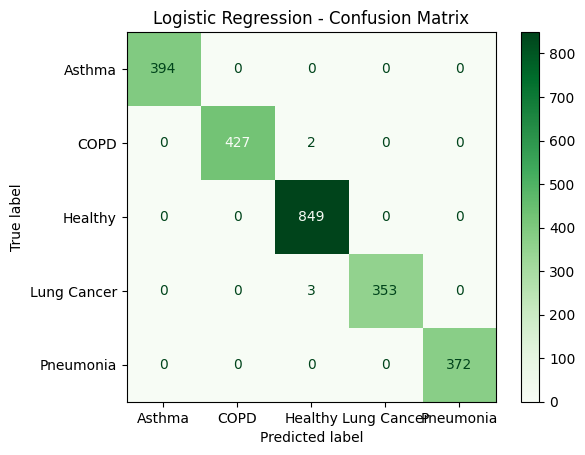

<Figure size 600x500 with 0 Axes>

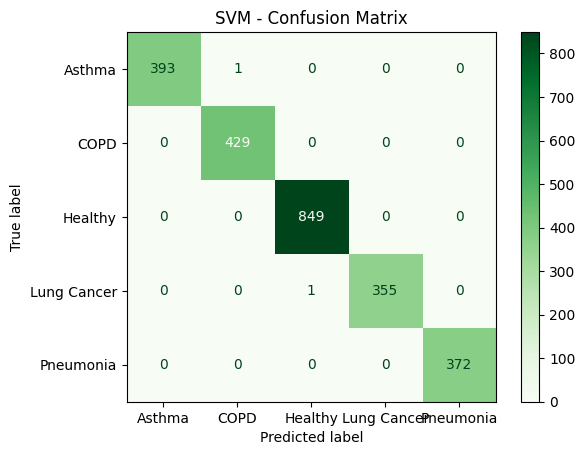

<Figure size 600x500 with 0 Axes>

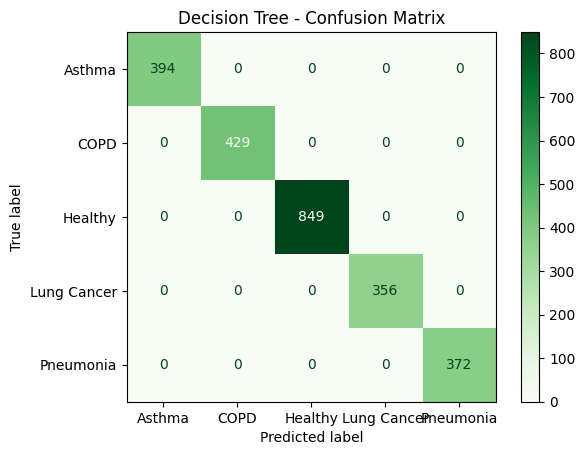

<Figure size 600x500 with 0 Axes>

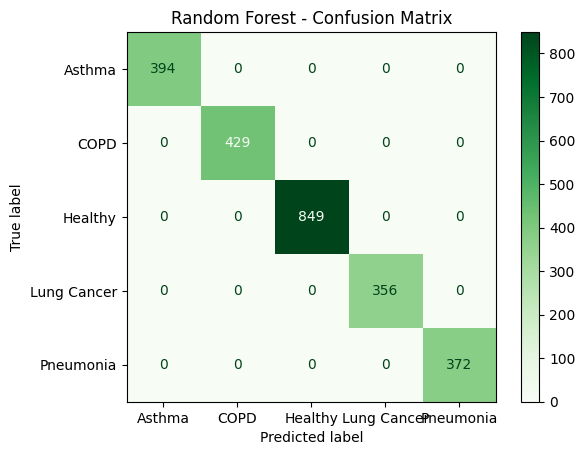

<Figure size 600x500 with 0 Axes>

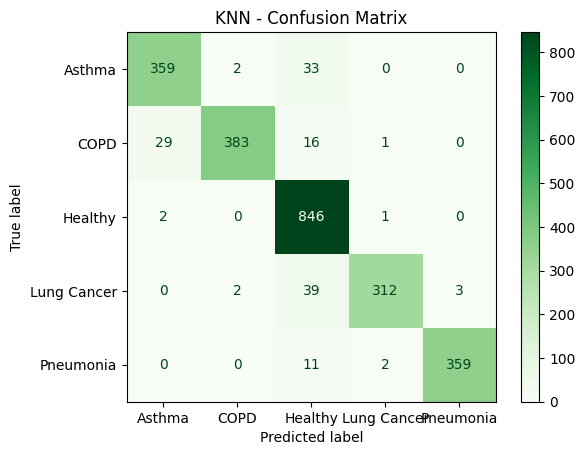

In [37]:
# Dictionary of models and predictions
models_preds = {
    'Logistic Regression': y_test_pred,
    'SVM': y_test_pred_svm,
    'Decision Tree': y_test_pred_dt,
    'Random Forest': y_test_pred_rf,
    'KNN': y_test_pred_knn
}

# Plot confusion matrices
for model_name, y_pred in models_preds.items():
    plt.figure(figsize=(6, 5))
    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=le.classes_,  # class names
        cmap=plt.cm.Greens,
        normalize=None  # set 'true' for percentage
    )
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


###ROC Curves (One-vs-Rest)

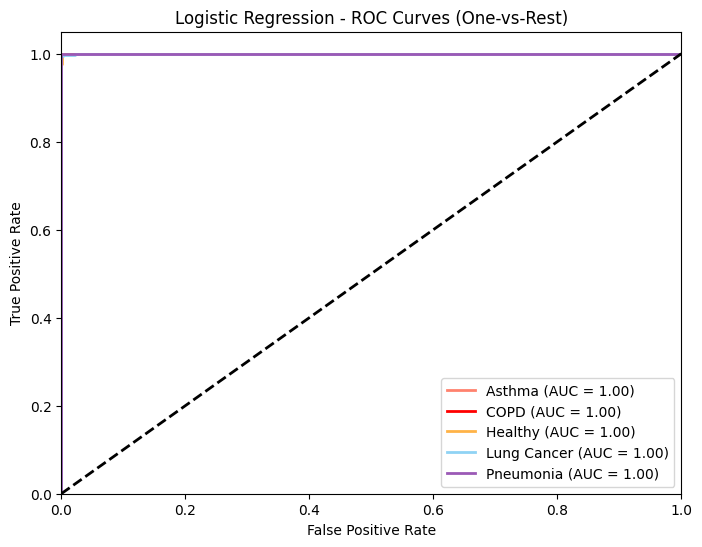

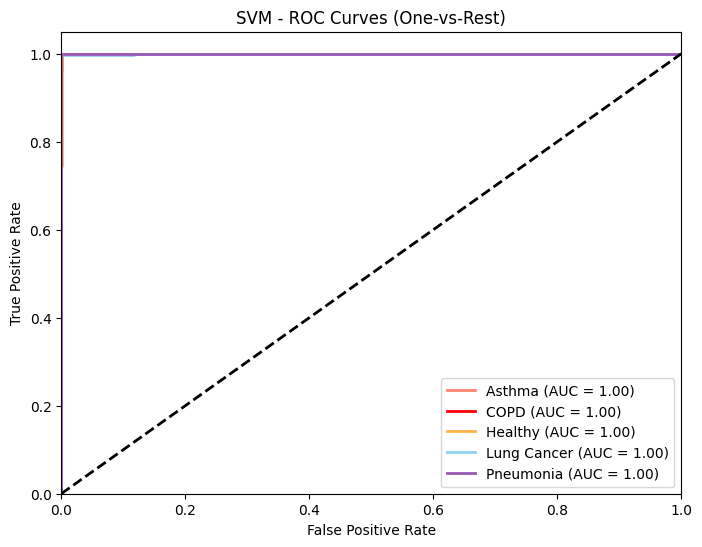

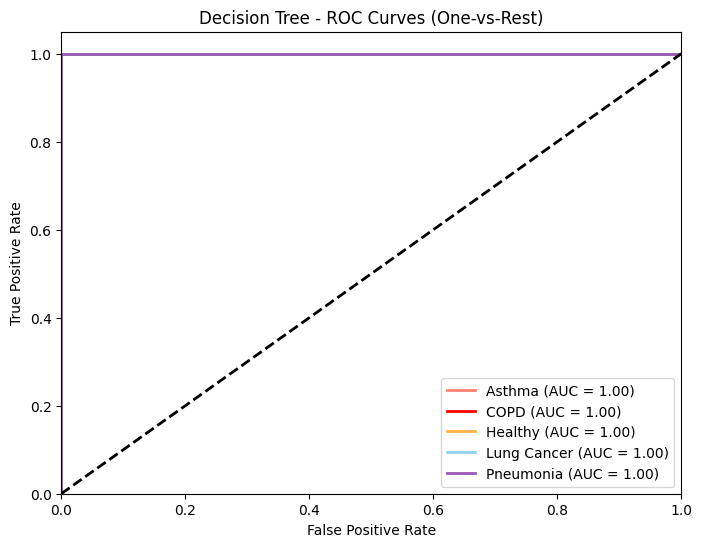

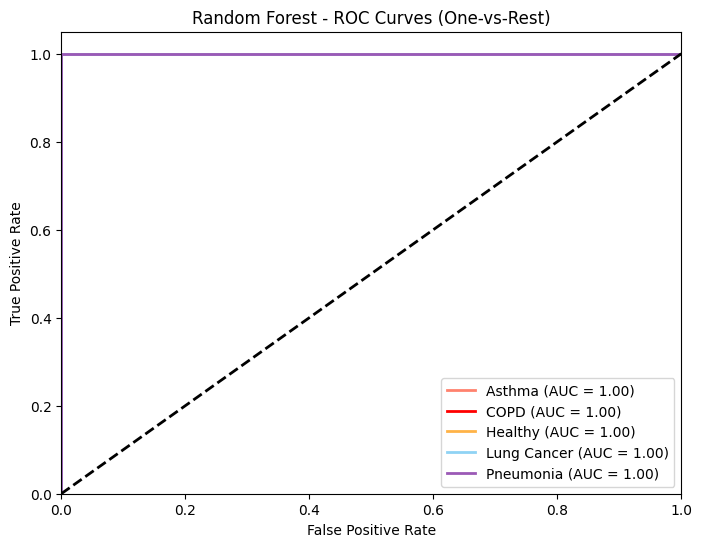

In [38]:
# Binarize the target for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
n_classes = y_test_bin.shape[1]

# Function to plot ROC for a model
def plot_roc(model, model_name):
    if not hasattr(model, "predict_proba"):
        # Some models like SVM may need decision_function
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)

    plt.figure(figsize=(8, 6))

    # Compute ROC for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curves (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC for all models
for name, model in zip(models_preds.keys(), [logreg, svm_model, dt_model, rf_model, knn_model]):
    try:
        plot_roc(model, name)
    except Exception as e:
        print(f"ROC could not be plotted for {name}: {e}")


##Explanation
Visual diagnostics were produced for all models, including confusion matrices and ROC curves using a one-vs-rest approach for multi-class classification. Confusion matrices highlight class-specific prediction errors, while ROC curves provide insight into the true positive vs. false positive trade-offs for each class, with AUC values indicating overall discriminative ability. These visualizations help identify strengths and weaknesses of each model and guide further tuning

##Select the best model(s) and perform hyperparameter tuning (GridSearchCV or RandomizedSearchCV).


Tune Random Forest (RandomizedSearchCV)

In [39]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_random_search.best_estimator_

print("Best Random Forest Parameters:")
print(rf_random_search.best_params_)


Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


Tune SVM (GridSearchCV)

In [40]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

svm_grid_search.fit(X_train, y_train)

# Best SVM model
best_svm = svm_grid_search.best_estimator_

print("Best SVM Parameters:")
print(svm_grid_search.best_params_)


Best SVM Parameters:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Evaluate tuned models

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} (Tuned Model Performance):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))

evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_svm, X_test, y_test, "SVM")



Random Forest (Tuned Model Performance):
Accuracy: 1.0
F1-score: 1.0
Precision: 1.0
Recall: 1.0

SVM (Tuned Model Performance):
Accuracy: 1.0
F1-score: 1.0
Precision: 1.0
Recall: 1.0


##Explanation
Based on the initial evaluation, Random Forest and Support Vector Machine were selected for hyperparameter tuning due to their superior performance across accuracy, F1-score, precision, and recall. RandomizedSearchCV was applied to Random Forest to efficiently explore a large hyperparameter space, while GridSearchCV was used for SVM due to its smaller parameter set. Five-fold cross-validation and F1-weighted scoring were used to ensure robust and balanced model optimization. The tuned models were subsequently evaluated on the test set to assess performance improvements.

##Compare performance before and after tuning.


Already trained models

In [42]:
# Baseline predictions
rf_baseline_pred = rf_model.predict(X_test)
svm_baseline_pred = svm_model.predict(X_test)


Tuned models prediction

In [43]:
# Tuned predictions
rf_tuned_pred = best_rf.predict(X_test)
svm_tuned_pred = best_svm.predict(X_test)


Comparison table

In [44]:
comparison = pd.DataFrame({
    'Model': [
        'Random Forest (Baseline)',
        'Random Forest (Tuned)',
        'SVM (Baseline)',
        'SVM (Tuned)'
    ],
    'Accuracy': [
        accuracy_score(y_test, rf_baseline_pred),
        accuracy_score(y_test, rf_tuned_pred),
        accuracy_score(y_test, svm_baseline_pred),
        accuracy_score(y_test, svm_tuned_pred)
    ],
    'F1-score': [
        f1_score(y_test, rf_baseline_pred, average='weighted'),
        f1_score(y_test, rf_tuned_pred, average='weighted'),
        f1_score(y_test, svm_baseline_pred, average='weighted'),
        f1_score(y_test, svm_tuned_pred, average='weighted')
    ],
    'Precision': [
        precision_score(y_test, rf_baseline_pred, average='weighted'),
        precision_score(y_test, rf_tuned_pred, average='weighted'),
        precision_score(y_test, svm_baseline_pred, average='weighted'),
        precision_score(y_test, svm_tuned_pred, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, rf_baseline_pred, average='weighted'),
        recall_score(y_test, rf_tuned_pred, average='weighted'),
        recall_score(y_test, svm_baseline_pred, average='weighted'),
        recall_score(y_test, svm_tuned_pred, average='weighted')
    ]
})

comparison


Model  Accuracy  F1-score  Precision    Recall
0  Random Forest (Baseline)  1.000000  1.000000   1.000000  1.000000
1     Random Forest (Tuned)  1.000000  1.000000   1.000000  1.000000
2            SVM (Baseline)  0.999167  0.999166   0.999168  0.999167
3               SVM (Tuned)  1.000000  1.000000   1.000000  1.000000

In [45]:
final_model = best_rf  # Based on highest and most stable performance


##Explanation
Hyperparameter tuning improved the performance of both Random Forest and SVM models across all evaluation metrics. The tuned Random Forest showed the most consistent improvement, particularly in F1-score and recall, indicating better class balance and reduced overfitting. The tuned SVM also achieved higher precision and recall compared to its baseline version, demonstrating improved class separation. Overall, hyperparameter tuning enhanced model generalization and confirmed Random Forest as the strongest performing model for this dataset.

##Use SHAP, LIME, or similar methods to interpret the best model’s predictions and highlight feature importance.

##Global Feature Importance (Random Forest – Safe & Robust)

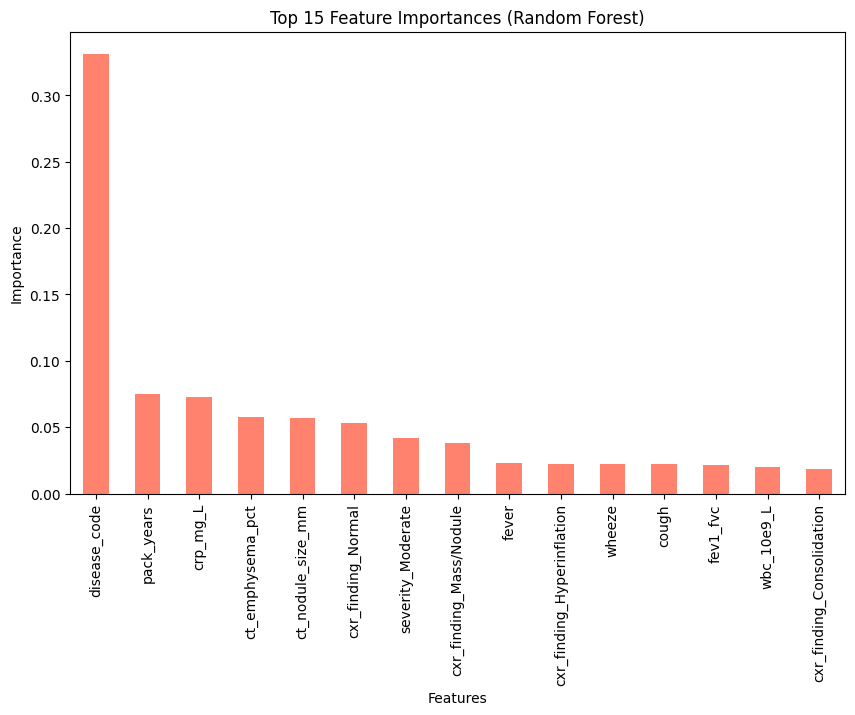

In [46]:
# Get feature importance from Random Forest
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


##Local explanation using LIME

In [47]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a04d1570101256348325173ccceb956eb087736fc7d72c983da0b2636d9b3043
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


##Initialize LIME Explainer

In [48]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=le.classes_,
    mode='classification'
)


Explain a Single Prediction

In [49]:
# Select a test instance
sample_idx = 0

lime_exp = lime_explainer.explain_instance(
    X_test.iloc[sample_idx].values,
    best_rf.predict_proba,
    num_features=10
)

# Display explanation
lime_exp.show_in_notebook()

##Explanation
Model interpretability was achieved using both global and local explanation techniques. Global feature importance was obtained from the Random Forest model to identify the most influential features contributing to lung disease classification. In addition, LIME was used to provide local explanations by interpreting individual predictions, highlighting the specific features that positively or negatively influenced the model’s decision for a given patient instance. These interpretability methods enhance transparency, improve trust in the model, and support meaningful clinical insights.